## Customer Behaviour Analysis

![image](image.jpg)

## a) Business Understanding

In the competitive landscape of retail and e-commerce, understanding customer shopping preferences is pivotal for businesses striving to enhance their customer experience, optimize product offerings, and tailor their marketing strategies. By gaining insights into consumer behavior, businesses can make informed decisions that drive customer satisfaction and loyalty, ultimately leading to increased sales and market share.

---------------------------------------------------------
## b) Problem  statement

In the dynamic and highly competitive retail and e-commerce landscape, businesses must continuously adapt to changing consumer behaviors and preferences to remain relevant and profitable. Traditional approaches to understanding customer needs often fall short in providing the granular insights necessary for personalized marketing and optimized product offerings. As a result, businesses risk losing market share to more agile competitors who leverage data-driven strategies.

#### **Prevailing Circumstances?**
The retail and e-commerce sector is highly competitive, requiring businesses to continuously adapt to evolving consumer behaviors and preferences to remain relevant and profitable.

#### **Problem Being Addressed?**
The business lacks deep, actionable insights into customer shopping preferences, hindering effective customer segmentation, identification of purchase drivers, optimization of product offerings, and enhancement of customer satisfaction.

#### **How the Project Aims to Solve the Problem?**
The project aims to analyze the Customer Shopping Preferences Dataset to:

i) Segment customers based on their shopping behaviors.<br>
ii) Identify key drivers of customer purchases.<br>
iii) Evaluate the impact of promotions on customer behavior.<br>
iv) Determine factors influencing customer satisfaction.

-----------------------------------------------------------------------------
## c) Objectives
#### Main Objective
To gain actionable insights into customer shopping preferences to inform business strategies, enhance customer satisfaction, and optimize product offerings.

#### Specific Objectives
i) Segment Customers: Group customers based on their shopping behaviors to enable targeted marketing.<br>
ii) Identify Purchase Drivers: Determine factors influencing customer purchasing decisions.<br>
iii) Evaluate Promotions: Assess the impact of discounts and promotional offers on customer behavior.<br>
iv) Enhance Satisfaction: Identify key factors contributing to customer satisfaction and positive review ratings.

## d) Data Understanding

The data used in this project was obtained from: [Kaggle](https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset).

This dataset includes features such as age, gender, purchase amount, preferred payment methods, frequency of purchases, feedback ratings, item types, shopping frequency, preferred shopping seasons, and interactions with promotional offers. It contains 3900 records, providing essential information for businesses to enhance their understanding of customer behavior, enabling data-driven decision-making and customer-centric strategies.

### Import Libraries

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

from xgboost import XGBRegressor

import xgboost as xgb
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor


from warnings import filterwarnings
filterwarnings(action='ignore')

### Loading the dataset

In [87]:
customer = pd.read_csv('shopping_data.csv')
customer.head(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,Yes,4,Cash,Quarterly


In [88]:
customer.tail(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3890,3891,35,Female,Shirt,Clothing,81,Nebraska,XL,Green,Winter,2.6,No,Standard,No,No,33,Debit Card,Annually
3891,3892,36,Female,Dress,Clothing,30,Colorado,L,Peach,Winter,4.7,No,Free Shipping,No,No,6,Bank Transfer,Quarterly
3892,3893,35,Female,Jewelry,Accessories,86,Michigan,L,Indigo,Summer,3.5,No,Standard,No,No,5,PayPal,Fortnightly
3893,3894,21,Female,Hat,Accessories,64,Massachusetts,L,White,Fall,3.3,No,Store Pickup,No,No,29,Bank Transfer,Bi-Weekly
3894,3895,66,Female,Skirt,Clothing,78,Connecticut,L,White,Spring,3.9,No,2-Day Shipping,No,No,44,Credit Card,Every 3 Months
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly


In [89]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [90]:
customer.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


## e) Exploratory Data Analysis

### Age Distribution

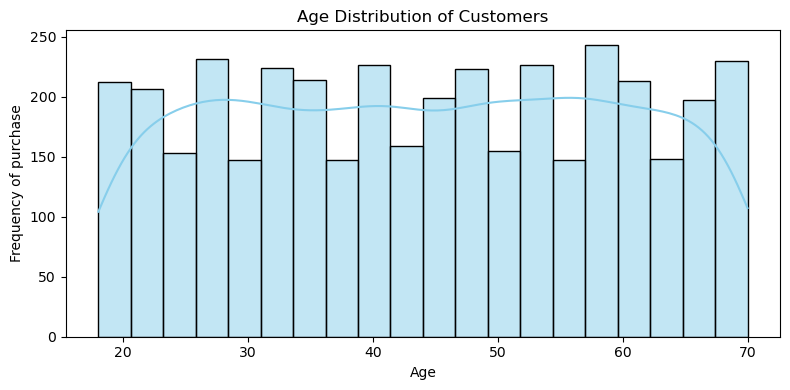

In [91]:
#  figure and axes
plt.figure(figsize=(8, 4))

# Plot the histogram
sns.histplot(customer['Age'], bins=20, kde=True, color='skyblue', edgecolor='black')

# labels and title
plt.xlabel('Age')
plt.ylabel('Frequency of purchase')
plt.title('Age Distribution of Customers')

# Show plot
plt.tight_layout()
plt.show()

### Distribution of review ratings

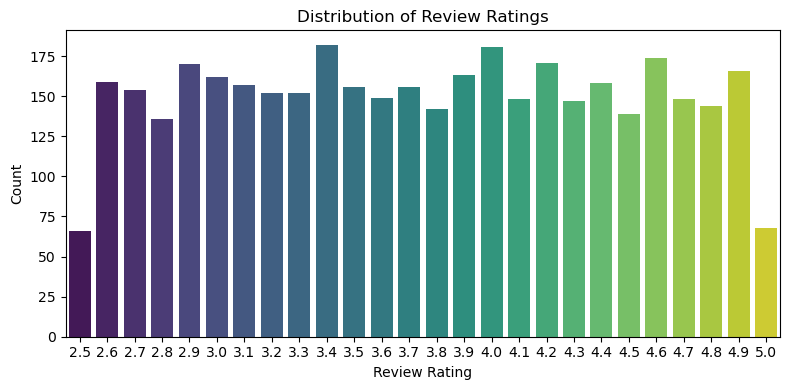

In [92]:

#  figure and axes
plt.figure(figsize=(8, 4))

# Plot the count plot
sns.countplot(x='Review Rating', data=customer, palette='viridis')

# Customize labels and title
plt.xlabel('Review Rating')
plt.ylabel('Count')
plt.title('Distribution of Review Ratings')

# Show plot
plt.tight_layout()
plt.show()


- Distribution of customer satisfaction levels based on their review ratings.

###  Most reviews and items with fewer reviews

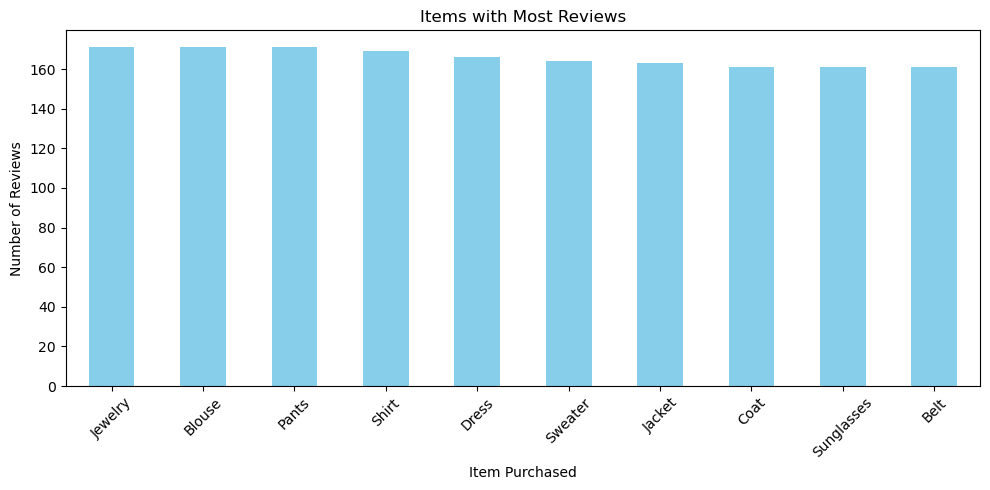

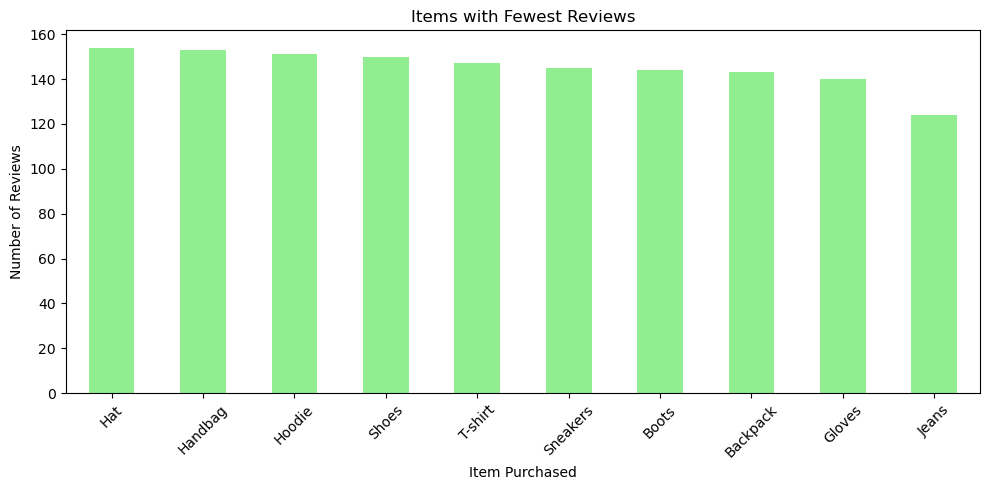

In [93]:

# Group by 'Item Purchased' and count reviews
item_review_counts = customer.groupby('Item Purchased')['Review Rating'].count().sort_values(ascending=False)

# Plotting items with most reviews
plt.figure(figsize=(10, 5))
item_review_counts.head(10).plot(kind='bar', color='skyblue')
plt.xlabel('Item Purchased')
plt.ylabel('Number of Reviews')
plt.title('Items with Most Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting items with less reviews
plt.figure(figsize=(10, 5))
item_review_counts.tail(10).plot(kind='bar', color='lightgreen')
plt.xlabel('Item Purchased')
plt.ylabel('Number of Reviews')
plt.title('Items with Fewest Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- The first plot shows the top 10 items that have received the most reviews, indicating which products are most popular or have generated the most feedback.
- The second plot displays the 10 items with the fewest reviews, highlighting products that may have lower customer engagement or visibility.

###  Purchases made for each item category.

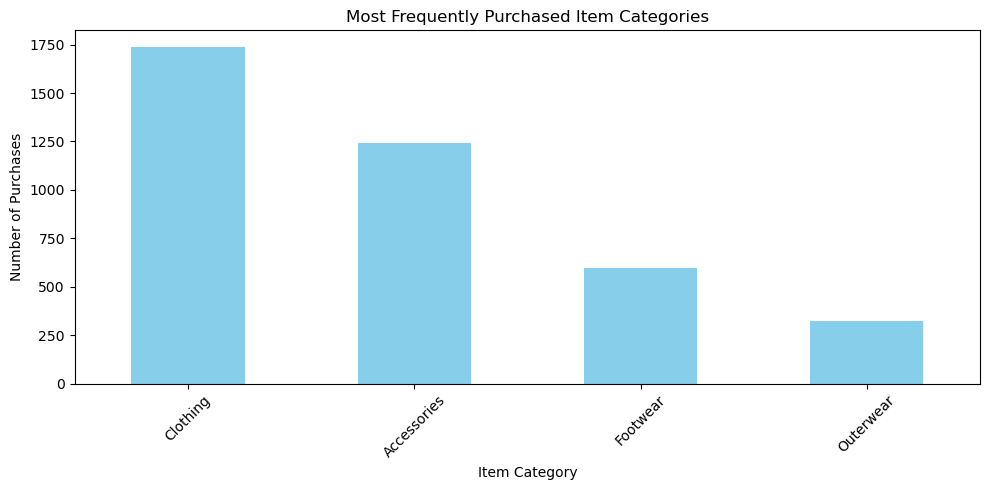

In [94]:

# Group by 'Category' and count purchases
category_purchase_counts = customer['Category'].value_counts().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 5))
category_purchase_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Item Category')
plt.ylabel('Number of Purchases')
plt.title('Most Frequently Purchased Item Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 The visualization provides insights into customer preferences and allows businesses to focus their marketing and inventory strategies accordingly.

### Purchases made during each season.

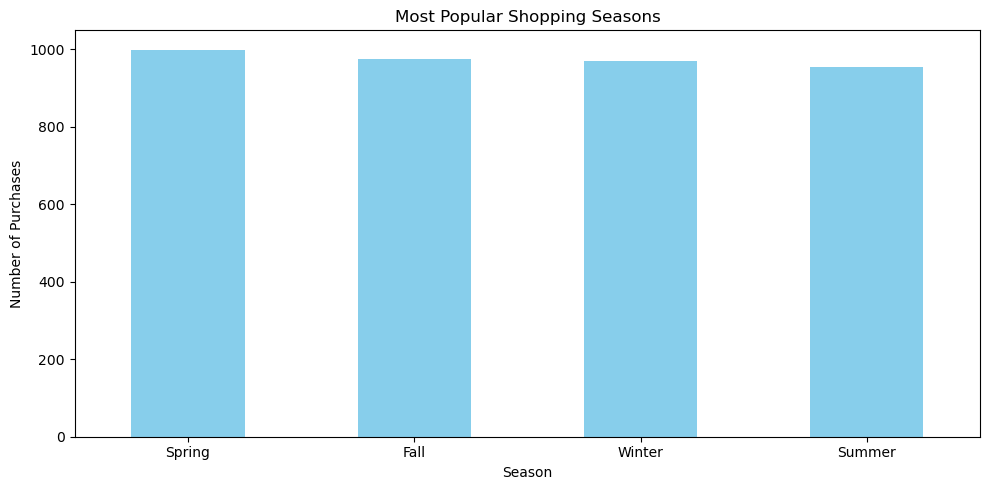

In [95]:

# Group by 'Season' and count purchases
season_purchase_counts = customer['Season'].value_counts().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 5))
season_purchase_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Season')
plt.ylabel('Number of Purchases')
plt.title('Most Popular Shopping Seasons')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


- Businesses can use this information to plan marketing campaigns, adjust inventory levels, and tailor promotions to match peak shopping seasons.

### Distribution of payment methods

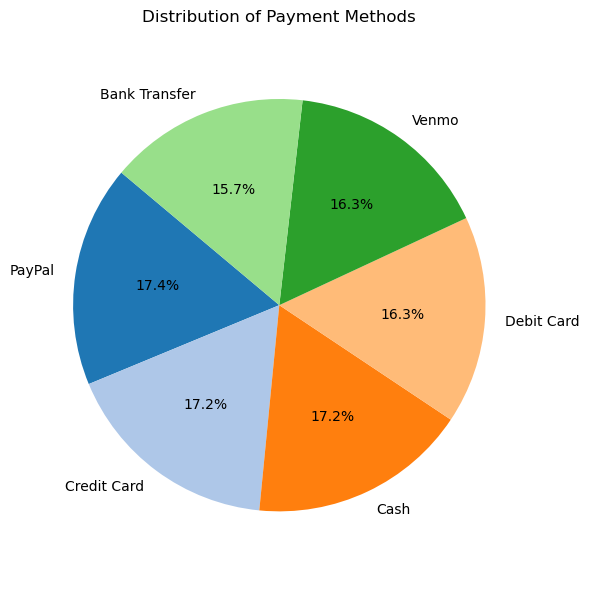

In [96]:

# Group by 'Payment Method' and count transactions
payment_method_counts = customer['Payment Method'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(6, 6))
plt.pie(payment_method_counts, labels=payment_method_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribution of Payment Methods')
plt.axis('equal')  
plt.tight_layout()
plt.show()


- This visualization helps identify which payment methods are most preferred by customers, indicating their payment preferences.
- Businesses can use this information to optimize their checkout processes, offer preferred payment options, and enhance customer satisfaction.

###  Correlations between numerical features

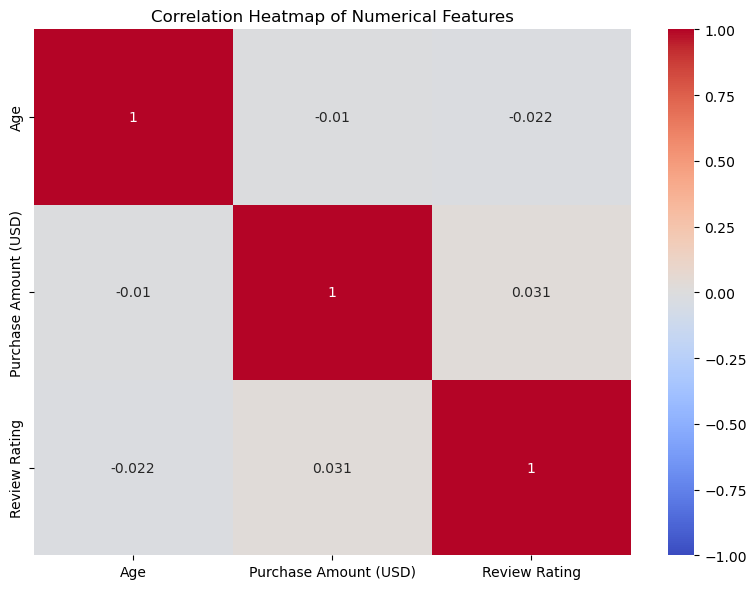

In [97]:

#  numerical columns for correlation analysis
numerical_columns = ['Age', 'Purchase Amount (USD)', 'Review Rating']

# Compute the correlation matrix
correlation_matrix = customer[numerical_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()


## f) Data Preprocessing

### encoding of categorical variables

In [98]:

# Label encoding for binary categories
le = LabelEncoder()
customer['Gender'] = le.fit_transform(customer['Gender'])
customer['Subscription Status'] = le.fit_transform(customer['Subscription Status'])
customer['Discount Applied'] = le.fit_transform(customer['Discount Applied'])
customer['Promo Code Used'] = le.fit_transform(customer['Promo Code Used'])

# One-hot encoding for multi-class categories
customer = pd.get_dummies(customer, columns=['Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Payment Method', 'Frequency of Purchases', 'Shipping Type'])



In [99]:
# Converting remaining non-numeric columns to numeric
non_numeric_columns = customer.select_dtypes(exclude=['number']).columns
if len(non_numeric_columns) > 0:
    customer[non_numeric_columns] = customer[non_numeric_columns].apply(pd.to_numeric, errors='coerce')

# Ensuring all data is of type float32
customer = customer.astype('float32')

# Fill NaNs with zeros or appropriate values
customer = customer.fillna(0)


### Standardization of Numerical Features

In [100]:

numerical_features = ['Age', 'Purchase Amount (USD)', 'Previous Purchases']
scaler = StandardScaler()
customer[numerical_features] = scaler.fit_transform(customer[numerical_features])


- This ensures that each feature contributes equally to the model and prevents any single feature from dominating due to its scale.

### Splitting Dataset into Features and Target

In [101]:
X = customer.drop(['Customer ID', 'Review Rating'], axis=1)
y = customer['Review Rating']

### Train-Test Split

In [102]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Modelling

### Baseline Model: Logistic Regression

In [103]:

# Initializing the linear regression model
model_lr = LinearRegression()

# Fit the model to the training data
model_lr.fit(X_train, y_train)

# Predictions on the test set
y_pred_lr = model_lr.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)


print(f"Linear Regression Mean Squared Error: {mse_lr}")


Linear Regression Mean Squared Error: 0.5705653429031372


### Decision Tree

In [104]:


# Initializing the decision tree regressor model
model_dt = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
model_dt.fit(X_train, y_train)

# Predictions on the test set
y_pred_dt = model_dt.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f"Decision Tree Mean Squared Error: {mse_dt}")


Decision Tree Mean Squared Error: 1.0780769524207685


### Using GridSearchCV for Decision tree  Hyperparameter Tuning

In [105]:

#  Decision Tree Regressor tuning with GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_dt = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                       param_grid=param_grid,
                       scoring='neg_mean_squared_error',
                       cv=5,
                       verbose=1,
                       n_jobs=-1)

grid_dt.fit(X_train, y_train)

print("Best parameters for Decision Tree:", grid_dt.best_params_)
print("Best MSE for Decision Tree:", -grid_dt.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Decision Tree: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10}
Best MSE for Decision Tree: 0.5332328833587315


### XG BOOST

In [106]:

# Initializing the XGBoost model
model_xgb = xgb.XGBRegressor(random_state=42)

# Fit the model to the training data
model_xgb.fit(X_train, y_train)

# Predictions on the test set
y_pred_xgb = model_xgb.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f"XGBoost Mean Squared Error: {mse_xgb}")


XGBoost Mean Squared Error: 0.6459589004516602


### Using GridSearchCV for XGBoost Hyperparameter Tuning

In [107]:

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage to prevent overfitting
    'max_depth': [3, 5, 7],  # Maximum depth of a tree
    'subsample': [0.6, 0.8, 1.0],  # Subsample ratio of training instances
    'colsample_bytree': [0.6, 0.8, 1.0],  # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2]  # Minimum loss reduction required to make a further partition on a leaf node of the tree
}

# Initialize XGBoost model
model_xgb = XGBRegressor(random_state=42)

# Setup grid search
grid_xgb = GridSearchCV(estimator=model_xgb,
                        param_grid=param_grid,
                        scoring='neg_mean_squared_error',  # Use negative mean squared error as the evaluation metric
                        cv=5,  # 5-fold cross-validation
                        verbose=1,
                        n_jobs=-1)

# Fit grid search
grid_xgb.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters for XGBoost:", grid_xgb.best_params_)
print("Best cross-validation negative mean squared error:", grid_xgb.best_score_)

# Predictions on the test set with the best model
y_pred_xgb_tuned = grid_xgb.best_estimator_.predict(X_test)

# Evaluate performance on the test set
mse_xgb_tuned = mean_squared_error(y_test, y_pred_xgb_tuned)
print(f"Tuned XGBoost Mean Squared Error: {mse_xgb_tuned}")


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best parameters for XGBoost: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best cross-validation negative mean squared error: -0.5052288472652435
Tuned XGBoost Mean Squared Error: 0.5456407070159912


### Neural Network

In [108]:

# Define the neural network model
model_nn = Sequential()
model_nn.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model_nn.add(Dense(64, activation='relu'))
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dense(1))  # Regression output layer

# Compile the model
model_nn.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model to the training data
history = model_nn.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stop])

# Evaluate the model on the test set
mse_nn = model_nn.evaluate(X_test, y_test)
print(f"Neural Network Mean Squared Error: {mse_nn}")


Epoch 1/100
78/78 [==============================] - 2s 10ms/step - loss: 1.9666 - val_loss: 0.5973
Epoch 2/100
78/78 [==============================] - 0s 4ms/step - loss: 0.5204 - val_loss: 0.5834
Epoch 3/100
78/78 [==============================] - 0s 4ms/step - loss: 0.4779 - val_loss: 0.5784
Epoch 4/100
78/78 [==============================] - 0s 5ms/step - loss: 0.4482 - val_loss: 0.5890
Epoch 5/100
78/78 [==============================] - 1s 7ms/step - loss: 0.4227 - val_loss: 0.5831
Epoch 6/100
78/78 [==============================] - 0s 4ms/step - loss: 0.3976 - val_loss: 0.6831
Epoch 7/100
78/78 [==============================] - 0s 4ms/step - loss: 0.3664 - val_loss: 0.6075
Epoch 8/100
78/78 [==============================] - 0s 4ms/step - loss: 0.3261 - val_loss: 0.6109
Epoch 9/100
78/78 [==============================] - 0s 4ms/step - loss: 0.2798 - val_loss: 0.6477
Epoch 10/100
78/78 [==============================] - 0s 4ms/step - loss: 0.2389 - val_loss: 0.6767
Epoch 11

### GridSearchCV for Neural Network Hyperparameter Tuning

In [109]:

# Function to create the neural network model
def create_model(layers=2, units=64, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(units, input_dim=X_train.shape[1], activation=activation))
    for _ in range(layers - 1):
        model.add(Dense(units, activation=activation))
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Wrap Keras model so it can be used by GridSearchCV
model = KerasRegressor(build_fn=create_model, verbose=0)

# Define the parameter grid for GridSearchCV
param_grid = {
    'layers': [2, 3],  # Number of hidden layers
    'units': [32, 64, 128],  # Number of units in each hidden layer
    'activation': ['relu', 'tanh'],  # Activation function
    'optimizer': ['adam', 'rmsprop']  # Optimizer
}

# Setup grid search
grid_nn = GridSearchCV(estimator=model,
                       param_grid=param_grid,
                       scoring='neg_mean_squared_error',  
                       cv=5,  # 5-fold cross-validation
                       verbose=1,
                       n_jobs=-1)

# Fit grid search
grid_nn.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])

# Print best parameters and best score
print("Best parameters for Neural Network:", grid_nn.best_params_)
print("Best cross-validation negative mean squared error:", grid_nn.best_score_)

# Predictions on the test set with the best model
y_pred_nn_tuned = grid_nn.best_estimator_.predict(X_test)

# Evaluate performance on the test set
mse_nn_tuned = mean_squared_error(y_test, y_pred_nn_tuned)
print(f"Tuned Neural Network Mean Squared Error: {mse_nn_tuned}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for Neural Network: {'activation': 'tanh', 'layers': 3, 'optimizer': 'adam', 'units': 32}
Best cross-validation negative mean squared error: -0.5256916403770446
Tuned Neural Network Mean Squared Error: 0.5650773048400879
